<h2 id="exercises">Exercises</h2>
<p>Do you work for this exercise in either a jupyter notebook named <code>evaluate</code> within your <code>regression-exercises</code> repository. By the end of this exercise you will also create a python script named <code>evaluate</code>, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name <code>evaluate</code> within your <code>regression-exercises</code> repo.</p>



In [1]:
import pandas as pd
import numpy as np

import viz
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error




1. Load the <code>tips</code> dataset from either <code>pydataset</code> or <code>seaborn</code>.


In [2]:
tips = sns.load_dataset('tips')


In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

<div class="highlight"><pre><span></span><span class="kn">from</span> <span class="nn">sklearn.linear_model</span> <span class="kn">import</span> <span class="n">LinearRegression</span>

<span class="c1"># assuming X and y are already defined</span>
<span class="n">model</span> <span class="o">=</span> <span class="n">LinearRegression</span><span class="p">()</span><span class="o">.</span><span class="n">fit</span><span class="p">(</span><span class="n">X</span><span class="p">,</span> <span class="n">y</span><span class="p">)</span>
<span class="n">predictions</span> <span class="o">=</span> <span class="n">model</span><span class="o">.</span><span class="n">predict</span><span class="p">(</span><span class="n">X</span><span class="p">)</span>
</pre></div>

<p>Modify and add to the code above as necessary for it to work with the tips dataset.</p>


In [4]:
model = LinearRegression().fit(tips[['total_bill']], tips.tip)
tips['yhat'] = model.predict(tips[['total_bill']])

tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


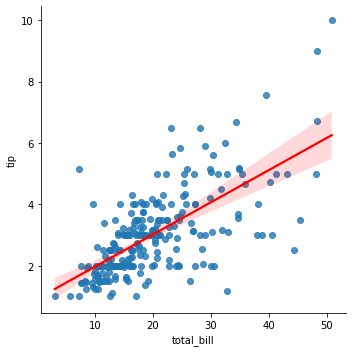

In [5]:
sns.lmplot(x="total_bill", y="tip", data=tips, line_kws={'color': 'red'})
plt.show()

In [20]:
tips['yhat_baseline'] = tips['tip'].mean()
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,predictions,yhat,yhat_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.704636,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.006223,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,3.126835,2.998279


3. Plot the residuals for the linear regression model that you made.


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

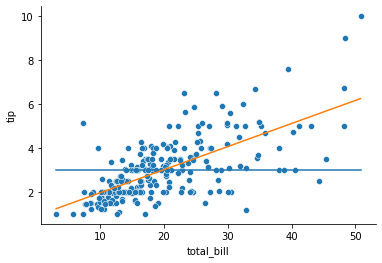

In [45]:
sns.scatterplot(x='total_bill', y = 'tip', data = tips)
sns.lineplot(x='total_bill', y='yhat_baseline', data = tips)
sns.lineplot(x='total_bill', y='yhat', data = tips)

In [46]:
# compute residuals
tips['residual'] = tips['tip'] - tips['yhat']
tips['residual_baseline'] = tips['tip'] - tips['yhat_baseline']

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,predictions,yhat,yhat_baseline,residual,residual_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.704636,2.998279,1.694636,1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.006223,2.998279,0.346223,1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,3.126835,2.998279,-0.373165,-0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,3.407250,2.998279,0.097250,-0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,3.502822,2.998279,-0.107178,-0.611721


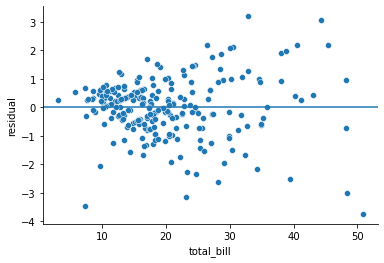

In [26]:
graph = sns.scatterplot(data=tips, x='total_bill', y='residual')
graph.axhline(0)

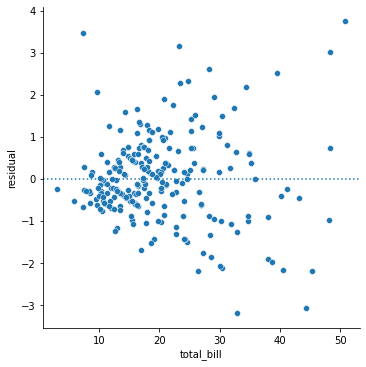

In [47]:
sns.relplot(x='total_bill', y='residual', data = tips)
plt.axhline(0, ls =':')

<AxesSubplot:>

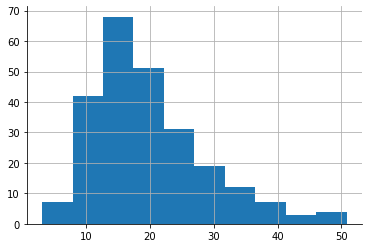

In [49]:
tips.total_bill.hist()

<AxesSubplot:>

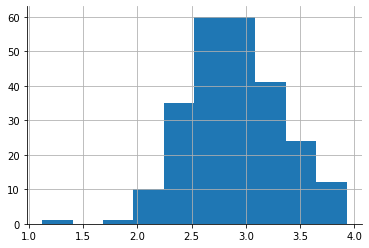

In [50]:
np.log(tips.total_bill).hist()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.


In [27]:
#SSE

tips['residual^2'] = tips.residual ** 2

tips['residual_baseline^2'] = tips.residual_baseline ** 2

In [30]:
SSE = tips['residual^2'].sum()
SSE

252.788743850776

In [51]:
SSE_baseline =tips['residual_baseline^2'].sum()
SSE_baseline

465.2124770491804

In [32]:
MSE = SSE / len(tips)
MSE

1.036019442011377

In [52]:
MSE_baseline = SSE_baseline / len(tips)
MSE_baseline

1.906608512496641

In [33]:
RMSE = sqrt(MSE)
RMSE

1.0178504025697377

In [53]:
RMSE_baseline = sqrt(MSE_baseline)
RMSE_baseline

1.3807999538298954

In [38]:
from sklearn.metrics import mean_squared_error

SSE2 = mean_squared_error(tips.tip, tips.yhat)*len(tips)
MSE2 = mean_squared_error(tips.tip, tips.yhat)
RMSE2 = sqrt(mean_squared_error(tips.tip, tips.yhat))


SSE2, MSE2, RMSE2


(252.788743850776, 1.036019442011377, 1.0178504025697377)

In [54]:
SSEb2 = mean_squared_error(tips.tip, tips.yhat_baseline)*len(tips)
MSEb2 = mean_squared_error(tips.tip, tips.yhat_baseline)
RMSEb2 = sqrt(mean_squared_error(tips.tip, tips.yhat_baseline))


SSEb2, MSEb2, RMSEb2


(465.2124770491804, 1.906608512496641, 1.3807999538298954)

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).


In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,predictions,yhat,yhat_baseline,residual,residual_baseline,residual^2,residual_baseline^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.704636,2.998279,1.694636,1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.006223,2.998279,0.346223,1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,3.126835,2.998279,-0.373165,-0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,3.407250,2.998279,0.097250,-0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,3.502822,2.998279,-0.107178,-0.611721,0.011487,0.374203


In [55]:
RMSE2_baseline = sqrt(mean_squared_error(tips.tip, tips.yhat_baseline))



In [56]:

df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])


In [57]:
df_baseline_eval

,metric
0,SSE_baseline
1,MSE_baseline
2,RMSE_baseline


In [58]:

df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.


7. What is the amount of variance explained in your model?


In [59]:
from sklearn.metrics import r2_score

In [61]:
r2_score(tips.tip, tips.yhat)

0.45661658635167657

8. Is your model better than the baseline model?


9. Create a file named <code>evaluate.py</code> that contains the following functions.</p>
<ul>
<li><code>plot_residuals(y, yhat)</code>: creates a residual plot</li>
<li><code>regression_errors(y, yhat)</code>: returns the following values:<ul>
<li>sum of squared errors (SSE)</li>
<li>explained sum of squares (ESS)</li>
<li>total sum of squares (TSS)</li>
<li>mean squared error (MSE)</li>
<li>root mean squared error (RMSE)</li>
</ul>
</li>
<li><code>baseline_mean_errors(y)</code>: computes the SSE, MSE, and RMSE for the baseline model</li>
<li><code>better_than_baseline(y, yhat)</code>: returns true if your model performs better than the baseline, otherwise false</li>
</ul>
</li>


In [62]:
def plot_residuals(actual, predicted):
    residuals = actual - predictedplt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual')
    plt.xlabel('actual')
    plt.title('Actual v. Residual')
    plt.show

10. Load the <code>mpg</code> dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your <code>evaluate.py</code> to help accomplish this.
                
                  

In [64]:
mpg = sns.load_dataset('mpg')


In [65]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
